In [ ]:
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

In [ ]:
filenames = ['/content/drive/MyDrive/kbo/baseball_' + str(x) + '.csv' for x in list(range(2015, 2021))]
filenames

['/content/drive/MyDrive/kbo/baseball_2015.csv',
 '/content/drive/MyDrive/kbo/baseball_2016.csv',
 '/content/drive/MyDrive/kbo/baseball_2017.csv',
 '/content/drive/MyDrive/kbo/baseball_2018.csv',
 '/content/drive/MyDrive/kbo/baseball_2019.csv',
 '/content/drive/MyDrive/kbo/baseball_2020.csv']

In [ ]:
data = pd.DataFrame()
for filename in tqdm(filenames):
  temp = pd.read_csv(filename)
  data = pd.concat([data, temp])

100%|██████████| 6/6 [00:02<00:00,  2.08it/s]


In [ ]:
baseball_data = data.copy()

In [ ]:
data.head()

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,PA,AB,RBI,RUN,HIT,H2,H3,HR,SB,CS,SF,BB,HP,KK,GD,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,OBP,OOO,win
0,20150328HHNE0,20150328,HH,NE,0,T,54.0,42.0,4.0,4.0,10.0,4,0,0.0,8,0,1,7.0,1.0,7.0,0.0,24.0,0.133333,15,2,0.352941,0.238095,0.0
1,20150328HHNE0,20150328,NE,HH,0,B,46.0,40.0,5.0,5.0,8.0,4,0,2.0,4,0,0,6.0,0.0,7.0,1.0,18.0,0.090909,11,1,0.304348,0.200000,1.0
2,20150328KTLT0,20150328,KT,LT,0,T,46.0,35.0,8.0,9.0,14.0,2,0,2.0,2,1,1,8.0,1.0,8.0,1.0,23.0,0.285714,14,4,0.511111,0.400000,0.0
3,20150328KTLT0,20150328,LT,KT,0,B,42.0,37.0,12.0,12.0,14.0,10,0,2.0,4,1,0,3.0,1.0,8.0,1.0,17.0,0.437500,16,7,0.439024,0.378378,1.0
4,20150328LGHT0,20150328,LG,HT,0,T,34.0,29.0,1.0,1.0,7.0,4,2,0.0,0,0,0,4.0,0.0,6.0,2.0,17.0,0.200000,10,2,0.333333,0.241379,0.0


In [ ]:
pd.options.display.max_columns = 30

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 1367
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G_ID       8656 non-null   object 
 1   GDAY_DS    8656 non-null   int64  
 2   T_ID       8656 non-null   object 
 3   VS_T_ID    8656 non-null   object 
 4   HEADER_NO  8656 non-null   int64  
 5   TB_SC      8656 non-null   object 
 6   PA         8656 non-null   float64
 7   AB         8656 non-null   float64
 8   RBI        8656 non-null   float64
 9   RUN        8656 non-null   float64
 10  HIT        8656 non-null   float64
 11  H2         8656 non-null   int64  
 12  H3         8656 non-null   int64  
 13  HR         8656 non-null   float64
 14  SB         8656 non-null   int64  
 15  CS         8656 non-null   int64  
 16  SF         8656 non-null   int64  
 17  BB         8656 non-null   float64
 18  HP         8656 non-null   float64
 19  KK         8656 non-null   float64
 20  GD      

In [ ]:
data.isna().mean()  #결측치 비율 확인

G_ID         0.0
GDAY_DS      0.0
T_ID         0.0
VS_T_ID      0.0
HEADER_NO    0.0
TB_SC        0.0
PA           0.0
AB           0.0
RBI          0.0
RUN          0.0
HIT          0.0
H2           0.0
H3           0.0
HR           0.0
SB           0.0
CS           0.0
SF           0.0
BB           0.0
HP           0.0
KK           0.0
GD           0.0
LOB          0.0
P_HRA_RT     0.0
P_AB_CN      0.0
P_HIT_CN     0.0
OBP          0.0
OOO          0.0
win          0.0
dtype: float64

In [ ]:
baseball_data = baseball_data.drop(columns=['RUN','G_ID','GDAY_DS','HEADER_NO', 'TB_SC'], axis=1)
baseball_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 0 to 1367
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T_ID      8656 non-null   object 
 1   VS_T_ID   8656 non-null   object 
 2   PA        8656 non-null   float64
 3   AB        8656 non-null   float64
 4   RBI       8656 non-null   float64
 5   HIT       8656 non-null   float64
 6   H2        8656 non-null   int64  
 7   H3        8656 non-null   int64  
 8   HR        8656 non-null   float64
 9   SB        8656 non-null   int64  
 10  CS        8656 non-null   int64  
 11  SF        8656 non-null   int64  
 12  BB        8656 non-null   float64
 13  HP        8656 non-null   float64
 14  KK        8656 non-null   float64
 15  GD        8656 non-null   float64
 16  LOB       8656 non-null   float64
 17  P_HRA_RT  8656 non-null   float64
 18  P_AB_CN   8656 non-null   int64  
 19  P_HIT_CN  8656 non-null   int64  
 20  OBP       8656 non-null   floa

## feature 간 상관관계 알아보기

In [ ]:
baseball_data_corr = baseball_data.corr()
baseball_data_corr

,PA,AB,RBI,HIT,H2,H3,HR,SB,CS,SF,BB,HP,KK,GD,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,OBP,OOO,win
PA,1.000000,0.860770,0.686455,0.766584,0.397270,0.140517,0.314857,0.174650,-0.019585,0.205656,0.545407,0.250312,0.067588,-0.057938,0.695470,0.331245,0.745622,0.644235,0.725046,0.635140,0.280049
AB,0.860770,1.000000,0.587432,0.803186,0.396647,0.136188,0.330989,0.101298,-0.071638,0.032129,0.108710,0.061843,0.119841,-0.094962,0.537054,0.320853,0.626073,0.586444,0.497387,0.619223,0.151959
RBI,0.686455,0.587432,1.000000,0.789146,0.475995,0.181062,0.567985,0.116999,-0.022423,0.267871,0.352053,0.192618,-0.127466,-0.052795,0.291913,0.634984,0.622888,0.827340,0.761772,0.762543,0.545779
HIT,0.766584,0.803186,0.789146,1.000000,0.514683,0.172947,0.399875,0.111697,0.027772,0.202768,0.166997,0.108739,-0.114044,0.058244,0.516882,0.508146,0.726634,0.778547,0.830608,0.957310,0.412081
H2,0.397270,0.396647,0.475995,0.514683,1.000000,0.057720,0.104613,0.027991,-0.012621,0.145169,0.113482,0.060593,-0.073333,-0.039292,0.240678,0.285317,0.541205,0.511660,0.442449,0.497381,0.271730
H3,0.140517,0.136188,0.181062,0.172947,0.057720,1.000000,0.024871,0.022649,-0.010206,0.090933,0.043052,0.021689,-0.036653,-0.029161,0.069829,0.109475,0.158946,0.164722,0.148588,0.166555,0.113421
HR,0.314857,0.330989,0.567985,0.399875,0.104613,0.024871,1.000000,0.001041,-0.006051,-0.004166,0.097174,0.063902,-0.011301,-0.059829,-0.025601,0.214329,0.080595,0.192327,0.343057,0.373002,0.284650
SB,0.174650,0.101298,0.116999,0.111697,0.027991,0.022649,0.001041,1.000000,0.039302,0.077741,0.177182,0.034870,0.035852,-0.053098,0.150943,0.054187,0.236874,0.150331,0.166309,0.113228,0.167154
CS,-0.019585,-0.071638,-0.022423,0.027772,-0.012621,-0.010206,-0.006051,0.039302,1.000000,-0.005973,0.075496,0.018223,-0.001966,-0.046097,-0.036006,0.040290,-0.032665,-0.010463,0.110875,0.074800,0.070132
SF,0.205656,0.032129,0.267871,0.202768,0.145169,0.090933,-0.004166,0.077741,-0.005973,1.000000,0.139073,0.069134,-0.125583,-0.045445,0.064829,0.138266,0.142304,0.173611,0.223370,0.255567,0.177206


<Axes: >

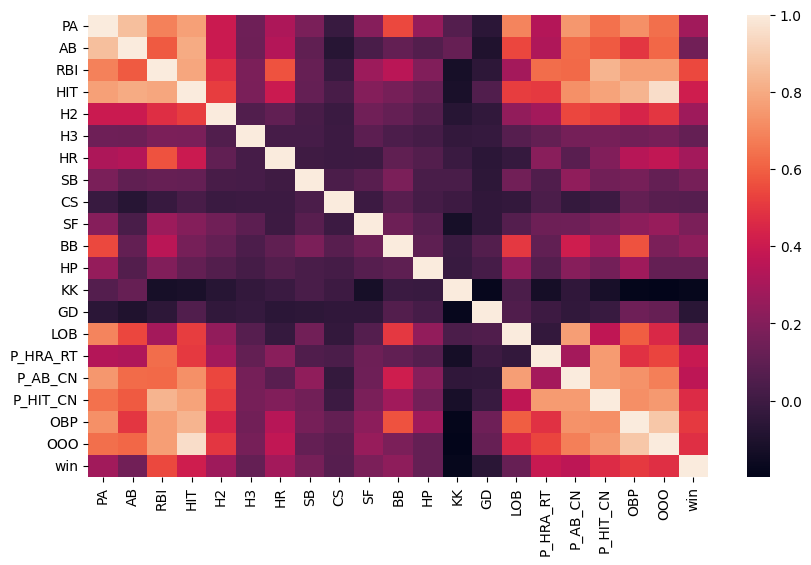

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(baseball_data_corr)

In [ ]:
baseball_data_corr['win'].sort_values(ascending=False)

win         1.000000
RBI         0.545779
OBP         0.505679
OOO         0.477615
P_HIT_CN    0.466158
HIT         0.412081
P_HRA_RT    0.391463
P_AB_CN     0.361901
HR          0.284650
PA          0.280049
H2          0.271730
BB          0.230207
SF          0.177206
SB          0.167154
AB          0.151959
LOB         0.119941
HP          0.115497
H3          0.113421
CS          0.070132
GD         -0.066277
KK         -0.181548
Name: win, dtype: float64

<Axes: >

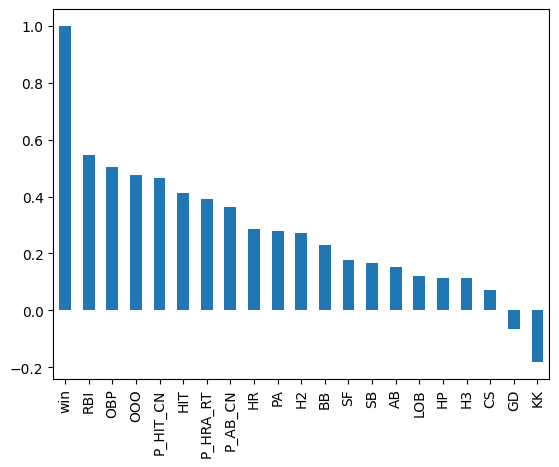

In [ ]:
baseball_data_corr['win'].sort_values(ascending=False).plot(kind='bar')

RUN, RBI, OBP, OOO, P_HIT_CN, HIT의 상관관계

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(baseball_data['T_ID'])
baseball_data.loc[:,'T_ID'] = le.transform(baseball_data['T_ID'])
baseball_data.loc[:,'VS_T_ID'] = le.transform(baseball_data['VS_T_ID'])
baseball_data.head()

,T_ID,VS_T_ID,PA,AB,RBI,HIT,H2,H3,HR,SB,CS,SF,BB,HP,KK,GD,LOB,P_HRA_RT,P_AB_CN,P_HIT_CN,OBP,OOO,win
0,0,6,54.0,42.0,4.0,10.0,4,0,0.0,8,0,1,7.0,1.0,7.0,0.0,24.0,0.133333,15,2,0.352941,0.238095,0.0
1,6,0,46.0,40.0,5.0,8.0,4,0,2.0,4,0,0,6.0,0.0,7.0,1.0,18.0,0.090909,11,1,0.304348,0.200000,1.0
2,2,4,46.0,35.0,8.0,14.0,2,0,2.0,2,1,1,8.0,1.0,8.0,1.0,23.0,0.285714,14,4,0.511111,0.400000,0.0
3,4,2,42.0,37.0,12.0,14.0,10,0,2.0,4,1,0,3.0,1.0,8.0,1.0,17.0,0.437500,16,7,0.439024,0.378378,1.0
4,3,1,34.0,29.0,1.0,7.0,4,2,0.0,0,0,0,4.0,0.0,6.0,2.0,17.0,0.200000,10,2,0.333333,0.241379,0.0


In [ ]:
baseball_data = baseball_data[baseball_data['win']!=0.5]

In [ ]:
train_data = baseball_data[['RBI','OBP','OOO','P_HIT_CN','HIT']]
train_target = baseball_data['win']

In [ ]:
train_data

,RBI,OBP,OOO,P_HIT_CN,HIT
0,4.0,0.352941,0.238095,2,10.0
1,5.0,0.304348,0.200000,1,8.0
2,8.0,0.511111,0.400000,4,14.0
3,12.0,0.439024,0.378378,7,14.0
4,1.0,0.333333,0.241379,2,7.0
...,...,...,...,...,...
1363,2.0,0.324324,0.242424,1,8.0
1364,7.0,0.395349,0.333333,4,13.0
1365,2.0,0.205882,0.181818,1,6.0
1366,5.0,0.297297,0.212121,3,7.0


In [ ]:
train_target

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
1363    0.0
1364    1.0
1365    0.0
1366    1.0
1367    0.0
Name: win, Length: 8522, dtype: float64

In [ ]:
train_data = pd.get_dummies(train_data)

In [ ]:
train_data

,RBI,OBP,OOO,P_HIT_CN,HIT
0,4.0,0.352941,0.238095,2,10.0
1,5.0,0.304348,0.200000,1,8.0
2,8.0,0.511111,0.400000,4,14.0
3,12.0,0.439024,0.378378,7,14.0
4,1.0,0.333333,0.241379,2,7.0
...,...,...,...,...,...
1363,2.0,0.324324,0.242424,1,8.0
1364,7.0,0.395349,0.333333,4,13.0
1365,2.0,0.205882,0.181818,1,6.0
1366,5.0,0.297297,0.212121,3,7.0


In [ ]:
# Feature용 DataFrame은 baseball_data의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출.
X_features = train_data.iloc[:, :-1]
y_label = train_target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )
print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(6817, 4) (1705, 4)
(6135, 4) (682, 4)


In [ ]:
# 학습, 검증, 테스트용 DMatrix를 생성.
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [ ]:
params = { 'max_depth':3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 400

In [ ]:
# 학습 데이터 셋은 'train', 평가 데이터 셋은 'eval'
eval_list = [(dtr,'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.67634	eval-logloss:0.67731
[1]	train-logloss:0.66112	eval-logloss:0.66275
[2]	train-logloss:0.64721	eval-logloss:0.64962
[3]	train-logloss:0.63443	eval-logloss:0.63764
[4]	train-logloss:0.62281	eval-logloss:0.62646
[5]	train-logloss:0.61222	eval-logloss:0.61653
[6]	train-logloss:0.60239	eval-logloss:0.60721
[7]	train-logloss:0.59341	eval-logloss:0.59858
[8]	train-logloss:0.58513	eval-logloss:0.59100
[9]	train-logloss:0.57752	eval-logloss:0.58365
[10]	train-logloss:0.57052	eval-logloss:0.57722
[11]	train-logloss:0.56402	eval-logloss:0.57140
[12]	train-logloss:0.55800	eval-logloss:0.56579
[13]	train-logloss:0.55241	eval-logloss:0.56095
[14]	train-logloss:0.54730	eval-logloss:0.55614
[15]	train-logloss:0.54254	eval-logloss:0.55191
[16]	train-logloss:0.53815	eval-logloss:0.54797
[17]	train-logloss:0.53406	eval-logloss:0.54422
[18]	train-logloss:0.53027	eval-logloss:0.54086
[19]	train-logloss:0.52674	eval-logloss:0.53766
[20]	train-logloss:0.52340	eval-logloss:0.53482
[2

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.392 0.08  0.576 0.639 0.086 0.983 0.387 0.401 0.659 0.923]
예측값 10개만 표시: [0, 0, 1, 1, 0, 1, 0, 0, 1, 1]


In [ ]:
y_test = y_test.astype('int')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , preds)

0.7624633431085044